E-COMMERCE CUSTOMER SEGMENTATION
THIS IS THE PROJECT WHERE WE USE THE E-COMMERECE DATA,WE USE THE KMEANS CLUSTERING MACHINE LEARNING ALOGRITHM TO CLUSTER THE CUSTOMER BASED ON THIER SPENDING

K MEANS CLUSTERING ALORITHM
i) K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

ii) Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

iii) It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

iv) It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

v) It is a centroid-based algorithm, where each cluster is associated with a centroid.

vi) The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

PROBELM STATEMENT:
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

STEP 01: Importing the libraries
In order to proceed further we have to import the required libraries in which the python environment we are working.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

STEP 02: Loading the data
So the next step is to upload the dataset to the python environment.

In [151]:
df = pd.read_csv('/content/data.csv', encoding='unicode_escape')

STEP 03: Exploring the data
In data Exploration we see the raw data which is suitable for further processing and analysis.

In [152]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


STEP 04: Preprocessing the data
In Data Preprocessing we handle the null values that we present in the data set.

We encode the object values so that it is suitable for applying the algorithm.

In [154]:
#Checking for null values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [155]:
#Lets create new data frame and copy df to it . So our new dataframe will be df1
df=df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [156]:
#Checking unique customer ID's so that we can delete duplicates later
count = df.CustomerID.value_counts()
count

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [157]:
#Let's check minimum and maximum of invoice dates so that we can get to know during what timeframe these items were purchased and to understand frequency of orders
#Let's first convert the column InvoiceDate to standard datetime format

import datetime #Library 
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [158]:
df['InvoiceDate'].agg(['min', 'max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [159]:
#In order to make it one year analysis its advised to consider either one of two options available 
#Option I From 2010-12-01 08:26:00 to 2011-12-01 08:26:00 ----> Results in deletion of 17650 rows 
#Option II From 2010-12-09 12:50:00 to 2011-12-09 12:50:00 ---->Results in deletion of 13586 rows - Lets consider option II since it results in less number of rows deletion
df1=df[(df['InvoiceDate'] > '2010-12-09 12:50:00')] 
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom
20241,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom
20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom
20243,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom
20244,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [160]:
# Since there there are multiple orders and quanitity for same customer ID Lets define new column called totalqty which represents total quantities for each customer ID  
df1['Totalqty'] = df1.groupby(['CustomerID'])['Quantity'].transform('sum')
df1

<ipython-input-160-55f4740c43cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Totalqty'] = df1.groupby(['CustomerID'])['Quantity'].transform('sum')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalqty
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117
20241,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom,117
20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117
20243,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117
20244,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,443
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,443
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,443
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,443


In [161]:
# Similarly lets define new column called Totalordervalue where totalordervalue equals quantity*Unit Pice
df1['Totalordervalue'] = df1.Quantity * df1.UnitPrice
df1['Totalordervalue'] = df1.groupby(['CustomerID'])['Totalordervalue'].transform('sum')
df1

<ipython-input-161-3d997903b2da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Totalordervalue'] = df1.Quantity * df1.UnitPrice
<ipython-input-161-3d997903b2da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Totalordervalue'] = df1.groupby(['CustomerID'])['Totalordervalue'].transform('sum')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalqty,Totalordervalue
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25
20241,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom,117,316.25
20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25
20243,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25
20244,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,443,862.81
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,443,862.81
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81


In [162]:
# Similarly lets define new column called Totalorders where totalorders denotes number of times that customer has purchased items
df1['Totalorders'] = df1.groupby(['CustomerID'])['CustomerID'].transform('size')
df1

<ipython-input-162-57f0d47fc202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Totalorders'] = df1.groupby(['CustomerID'])['CustomerID'].transform('size')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalqty,Totalordervalue,Totalorders
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18
20241,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom,117,316.25,18
20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18
20243,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25,18
20244,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25,18
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,443,862.81,52
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,443,862.81,52
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81,52
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81,52


In [163]:
df1['Avgunitprice'] = df1.groupby(['CustomerID'])['UnitPrice'].transform('mean')
df1

<ipython-input-163-5a9ba048591d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Avgunitprice'] = df1.groupby(['CustomerID'])['UnitPrice'].transform('mean')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalqty,Totalordervalue,Totalorders,Avgunitprice
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18,4.016667
20241,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom,117,316.25,18,4.016667
20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18,4.016667
20243,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25,18,4.016667
20244,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25,18,4.016667
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,443,862.81,52,3.637885
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,443,862.81,52,3.637885
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81,52,3.637885
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81,52,3.637885


In [164]:
df1['Avgordervalue'] = df1.Quantity * df1.UnitPrice
df1['Avgordervalue'] = df1.groupby(['CustomerID'])['Avgordervalue'].transform('mean')
df1

<ipython-input-164-b7a07b2d0da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Avgordervalue'] = df1.Quantity * df1.UnitPrice
<ipython-input-164-b7a07b2d0da4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Avgordervalue'] = df1.groupby(['CustomerID'])['Avgordervalue'].transform('mean')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalqty,Totalordervalue,Totalorders,Avgunitprice,Avgordervalue
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18,4.016667,17.569444
20241,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom,117,316.25,18,4.016667,17.569444
20242,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18,4.016667,17.569444
20243,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25,18,4.016667,17.569444
20244,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,117,316.25,18,4.016667,17.569444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,443,862.81,52,3.637885,16.592500
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,443,862.81,52,3.637885,16.592500
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81,52,3.637885,16.592500
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,443,862.81,52,3.637885,16.592500


In [165]:
#Now let's delete all the duplicates of CustomerID and keep unique ID's
df1 = df1.drop_duplicates(subset='CustomerID', keep="first")
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalqty,Totalordervalue,Totalorders,Avgunitprice,Avgordervalue
20240,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,117,316.25,18,4.016667,17.569444
20250,538035,84341B,SMALL PINK MAGIC CHRISTMAS TREE,1,2010-12-09 13:03:00,0.85,16065.0,United Kingdom,231,372.09,74,1.873243,5.028243
20325,538037,20974,12 PENCILS SMALL TUBE SKULL,24,2010-12-09 13:05:00,0.65,17430.0,United Kingdom,190,265.76,14,1.997857,18.982857
20332,538040,22592,CARDHOLDER HOLLY WREATH METAL,1,2010-12-09 13:08:00,3.75,16520.0,United Kingdom,557,1036.62,157,2.763631,6.602675
20401,538048,84360,TABLE LAMP WHITE SHADE WOOD BASE,36,2010-12-09 13:14:00,4.65,15945.0,United Kingdom,52,181.00,2,2.750000,90.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536969,581233,22178,VICTORIAN GLASS HANGING T-LIGHT,6,2011-12-08 10:33:00,1.95,13436.0,United Kingdom,76,196.89,12,5.830000,16.407500
537255,581241,22922,FRIDGE MAGNETS US DINER ASSORTED,12,2011-12-08 10:58:00,0.85,15520.0,United Kingdom,314,343.50,18,1.724444,19.083333
538064,581385,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,2011-12-08 13:11:00,3.75,13298.0,United Kingdom,96,360.00,2,3.750000,180.000000
538812,581416,22466,FAIRY TALE COTTAGE NIGHT LIGHT,1,2011-12-08 14:58:00,1.95,14569.0,United Kingdom,79,227.39,12,3.920000,18.949167


In [166]:
#AS we can see negative values in quantity column lets check for minimum and maximum values in quanitity column
# negative values can be orders that were cancelled or returned so lets just check and exclude from our data since it doesnt add much value to our analysis  

df1['Quantity'].agg(['min', 'max'])

min     -600
max    74215
Name: Quantity, dtype: int64

In [167]:
#let's count number of negative values that exist in our df1 dataframe and delete rows corresponding to them 
tnq = (df1['Quantity'] <= 0).sum()
tpq = (df1['Quantity'] >= 0).sum()
tnq,tpq

(209, 4096)

In [168]:
#I think the easiest way is looking at rows where all values are not equal to 0
df1 = df1[df1['Quantity'] > -1]
tnq = (df1['Quantity'] <= 0).sum()
tpq = (df1['Quantity'] >= 0).sum()
tnq,tpq

(0, 4096)

In [169]:
# Let's check for negative values in Total qty and delete it 
(df1['Totalqty']<0).any()

True

In [170]:
df1 = df1[df1['Totalqty'] >= 0]

In [171]:
(df1['Totalqty']<0).any()

False

In [172]:
#Deleting all the unnecessary columns from the Dataframe 
df2=df1.drop(['Quantity','InvoiceNo','StockCode','Description',	'InvoiceDate','UnitPrice','Country'], axis=1)

In [173]:
df2

,CustomerID,Totalqty,Totalordervalue,Totalorders,Avgunitprice,Avgordervalue
20240,14479.0,117,316.25,18,4.016667,17.569444
20250,16065.0,231,372.09,74,1.873243,5.028243
20325,17430.0,190,265.76,14,1.997857,18.982857
20332,16520.0,557,1036.62,157,2.763631,6.602675
20401,15945.0,52,181.00,2,2.750000,90.500000
...,...,...,...,...,...,...
536969,13436.0,76,196.89,12,5.830000,16.407500
537255,15520.0,314,343.50,18,1.724444,19.083333
538064,13298.0,96,360.00,2,3.750000,180.000000
538812,14569.0,79,227.39,12,3.920000,18.949167


In [174]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 20240 to 541768
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4094 non-null   float64
 1   Totalqty         4094 non-null   int64  
 2   Totalordervalue  4094 non-null   float64
 3   Totalorders      4094 non-null   int64  
 4   Avgunitprice     4094 non-null   float64
 5   Avgordervalue    4094 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 223.9 KB


In [175]:
df2.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99,1.0]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,100%,max
CustomerID,4094.0,15296.482169,1722.010146,1.234600e+04,12397.930000,12449.860000,12508.790000,12559.720000,12609.650000,13811.250000,15296.500000,16776.750000,17981.400000,18045.840000,18109.210000,18170.140000,18224.070000,18287.00,18287.00
Totalqty,4094.0,1073.803371,4661.887850,0.000000e+00,10.930000,23.000000,30.000000,38.000000,44.000000,153.000000,360.000000,922.750000,3136.350000,3615.000000,4376.830000,5596.920000,9088.910000,196719.00,196719.00
Totalordervalue,4094.0,1806.258614,8099.895345,-5.329071e-15,45.453000,73.458000,89.047400,100.872000,110.393000,291.910000,634.330000,1531.267500,5184.891500,5999.704800,7033.303800,9356.525000,15828.147100,279489.02,279489.02
Totalorders,4094.0,88.719345,226.851294,1.000000e+00,1.000000,2.000000,3.000000,4.000000,5.000000,17.000000,40.000000,97.000000,298.350000,334.840000,379.210000,459.280000,659.630000,7839.00,7839.00
Avgunitprice,4094.0,6.152886,129.974886,0.000000e+00,0.700249,0.974919,1.122762,1.250000,1.345156,2.199308,2.916667,3.842277,6.618500,7.083520,7.940165,9.589800,16.532663,8055.78,8055.78
Avgordervalue,4094.0,30.932478,105.527166,-1.480297e-16,2.775495,3.416677,3.731021,4.062687,4.361724,11.329676,17.005976,23.602859,80.218917,97.832462,126.163306,178.217468,297.000000,3861.00,3861.00


In [176]:
df2['Avgordervalue'].agg(['min', 'max'])

min   -1.480297e-16
max    3.861000e+03
Name: Avgordervalue, dtype: float64

In [177]:
df2 = df2[df2['Avgordervalue'] >= 0]

In [178]:
df2['Totalordervalue'].agg(['min', 'max'])

min         0.00
max    279489.02
Name: Totalordervalue, dtype: float64

In [179]:
df2 = df2[df2['Totalordervalue'] >= 0]

In [180]:
df2.isnull().sum()

CustomerID         0
Totalqty           0
Totalordervalue    0
Totalorders        0
Avgunitprice       0
Avgordervalue      0
dtype: int64

In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4093 entries, 20240 to 541768
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4093 non-null   float64
 1   Totalqty         4093 non-null   int64  
 2   Totalordervalue  4093 non-null   float64
 3   Totalorders      4093 non-null   int64  
 4   Avgunitprice     4093 non-null   float64
 5   Avgordervalue    4093 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 223.8 KB


In [182]:

#after checking with the  description, we are about to clip the 0.99th percentie as outliers.
def cap_data(df):
    for col in df.columns:
      percentiles = df[col].quantile([0.01, 0.95]).values
      df[col] = np.clip(df[col], percentiles[0], percentiles[1])  
      
    return df

df2=cap_data(df2)


In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4093 entries, 20240 to 541768
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4093 non-null   float64
 1   Totalqty         4093 non-null   float64
 2   Totalordervalue  4093 non-null   float64
 3   Totalorders      4093 non-null   float64
 4   Avgunitprice     4093 non-null   float64
 5   Avgordervalue    4093 non-null   float64
dtypes: float64(6)
memory usage: 223.8 KB


In [210]:
df3=df2
df3

,CustomerID,Totalqty,Totalordervalue,Totalorders,Avgunitprice,Avgordervalue
20240,14479.0,117.0,316.25,18.0,4.016667,17.569444
20250,16065.0,231.0,372.09,74.0,1.873243,5.028243
20325,17430.0,190.0,265.76,14.0,1.997857,18.982857
20332,16520.0,557.0,1036.62,157.0,2.763631,6.602675
20401,15945.0,52.0,181.00,2.0,2.750000,80.224000
...,...,...,...,...,...,...
536969,13436.0,76.0,196.89,12.0,5.830000,16.407500
537255,15520.0,314.0,343.50,18.0,1.724444,19.083333
538064,13298.0,96.0,360.00,2.0,3.750000,80.224000
538812,14569.0,79.0,227.39,12.0,3.920000,18.949167


STEP 06: Visualizing the data
Since the data is full of numbers and floats it is more efficient and easy to view it in a pictorial or in a graphical form.

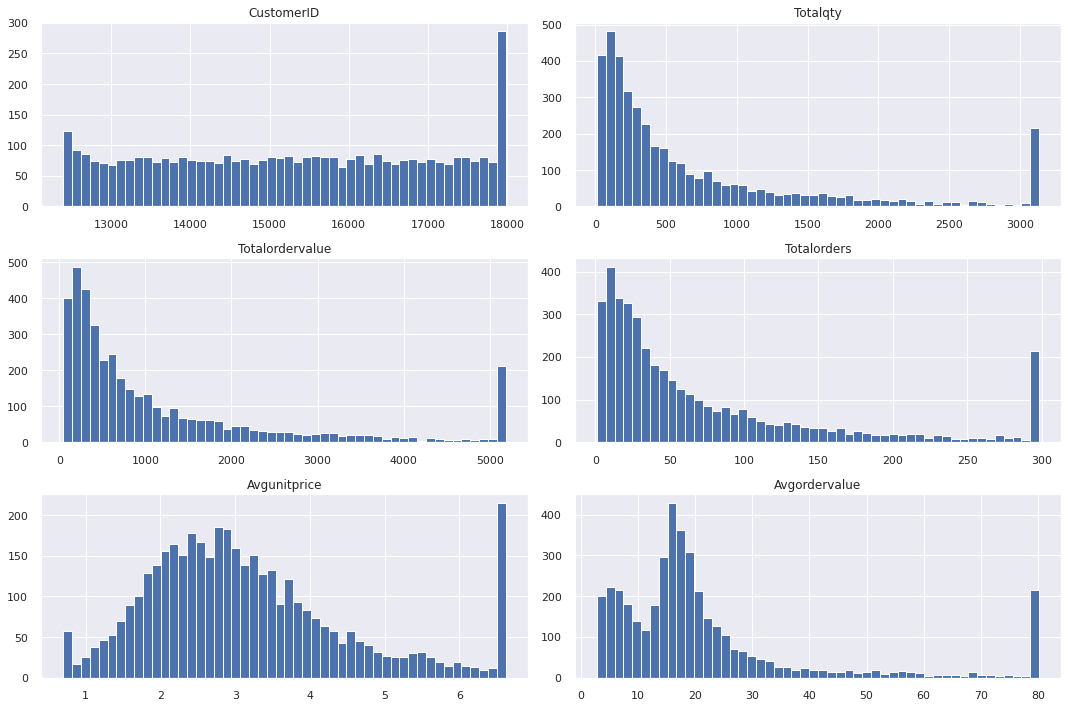

In [211]:
sns.set(rc={'figure.figsize':(15,10)})
hist = df3.hist(bins=50)

STEP 5:  NORMALISING THE DATASET

In order to get the good k value we have to do scaling because it is used for making data points generalized so that the distance between them will be lower.

In [212]:
def preprocess(dfr):
    """Preprocess data for KMeans clustering"""
    
    df_log = np.log1p(dfr)
    scaler = StandardScaler()
    scaler.fit(df_log)
    norm = scaler.transform(df_log)
    return norm

In [213]:
norm  = preprocess(df3)
df3 =pd.DataFrame(norm,columns =df3.columns)
sns.set(rc={'figure.figsize':(20,10)})

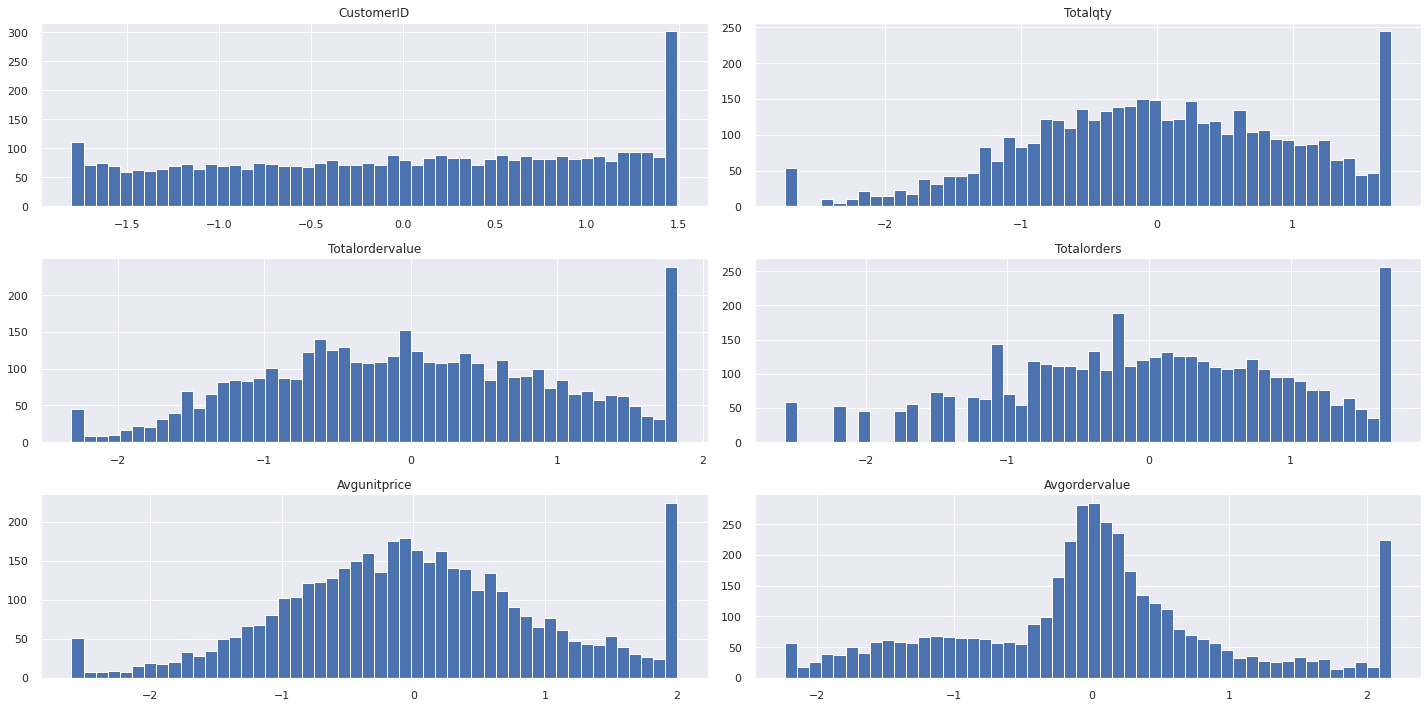

In [214]:
hist = df3.hist(bins=50)

Removing Outliers using Boxplot

k-Means Clustering on the basis of 3D data
Now, we shall consider 3 columns of data.

In [215]:
def elbow_plot(dfr):
    """Create elbow plot from normalized data"""
    
    norm = dfr
    sse = {}
    
    for k in range(1, 15):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(norm)
        sse[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

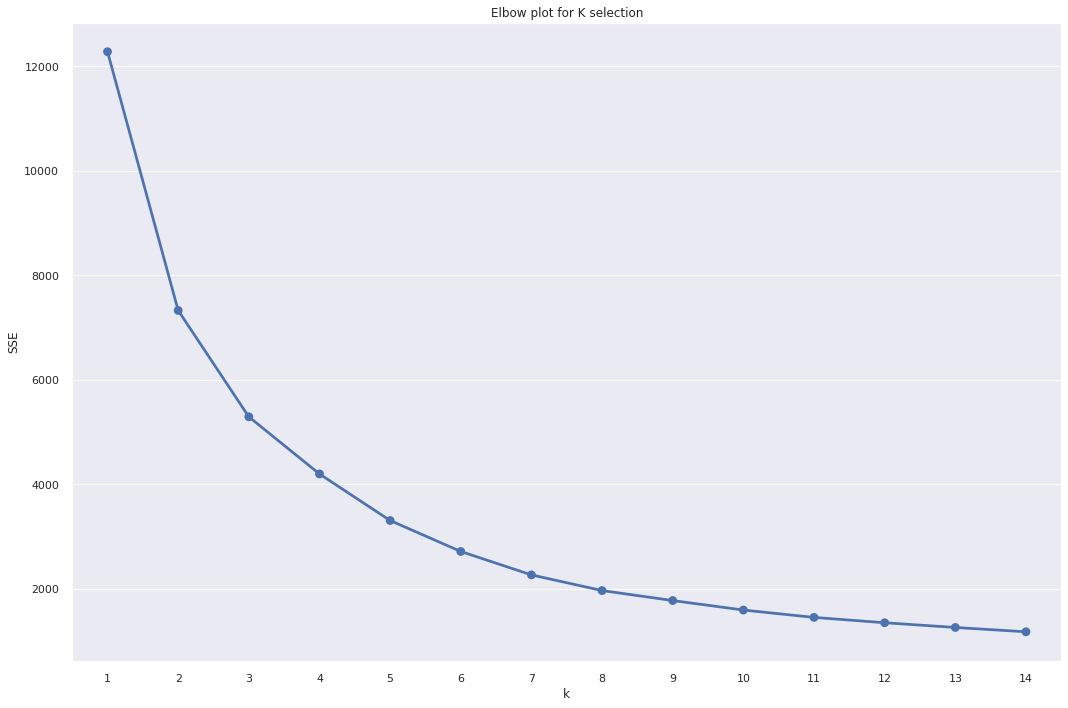

In [216]:
sns.set(rc={'figure.figsize':(15,10)})
X = df3[['Totalorders','Totalordervalue','Avgordervalue']]
elbow_plot(X)


This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [133]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
from kneed import KneeLocator
def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    
    norm = df
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(norm)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(
                 x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing'
                 )
    k = kn.knee + increment - decrement
    return k

In [218]:
k = find_k(X)
k

5

In [231]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the Group of the input data
y=km1.predict(X)
#adding the Group 
df3["Group"] = y
#The new dataframe with the clustering done
df3.head()

,CustomerID,Totalqty,Totalordervalue,Totalorders,Avgunitprice,Avgordervalue,Group
0,-0.425981,-0.902865,-0.645552,-0.646502,0.725125,0.054850,3
1,0.495297,-0.361652,-0.502213,0.526430,-0.987173,-1.563008,1
2,1.218096,-0.517330,-0.798802,-0.848438,-0.856733,0.160339,3
3,0.742837,0.340926,0.402101,1.162940,-0.157814,-1.229324,1
4,0.428843,-1.543618,-1.136831,-2.223305,-0.168961,2.176921,0


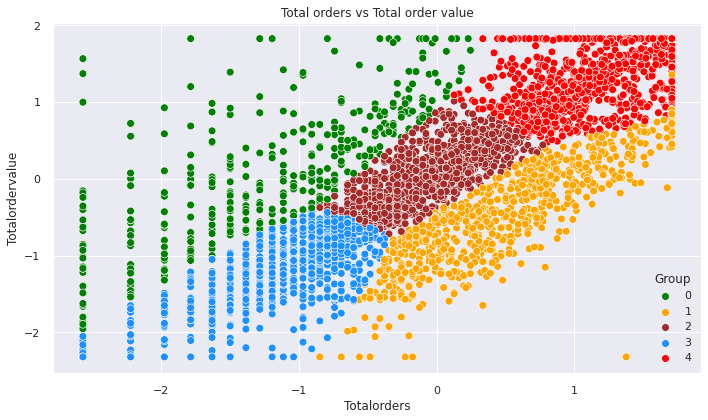

In [232]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Totalorders',y = 'Totalordervalue',hue ="Group",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df3  ,s = 60 )
plt.xlabel('Totalorders')
plt.ylabel('Totalordervalue') 
plt.title('Total orders vs Total order value')
plt.show()

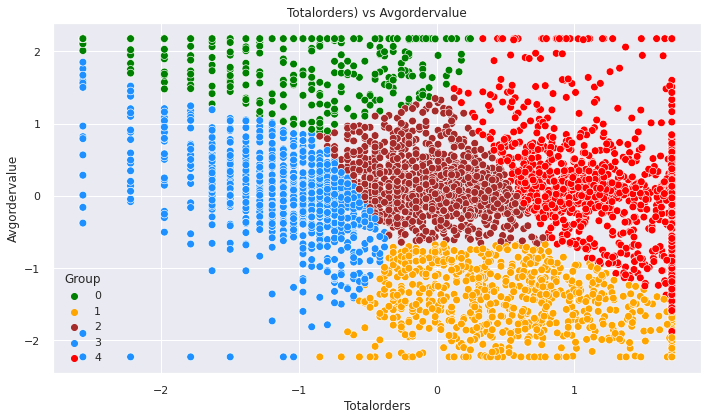

In [247]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Totalorders',y = 'Avgordervalue',hue ="Group",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df3  ,s = 60 )
plt.xlabel('Totalorders')
plt.ylabel('Avgordervalue') 
plt.title('Totalorders) vs Avgordervalue')
plt.show()

Conclusion on Customers Group characteristics :

Group 0 customer characteristics - High Average order value but low number of orders  
Group 1 customer characteristics -  Low to moderate Average order value but High number of orders

Group 2 customer characteristics -  Moderate Average order value and moderate number of orders   
Group 3 customer characteristics -  Moderate Average order value and Low to moderate number of orders  
Group 4 customer characteristics -  High Average order value and High number of orders  

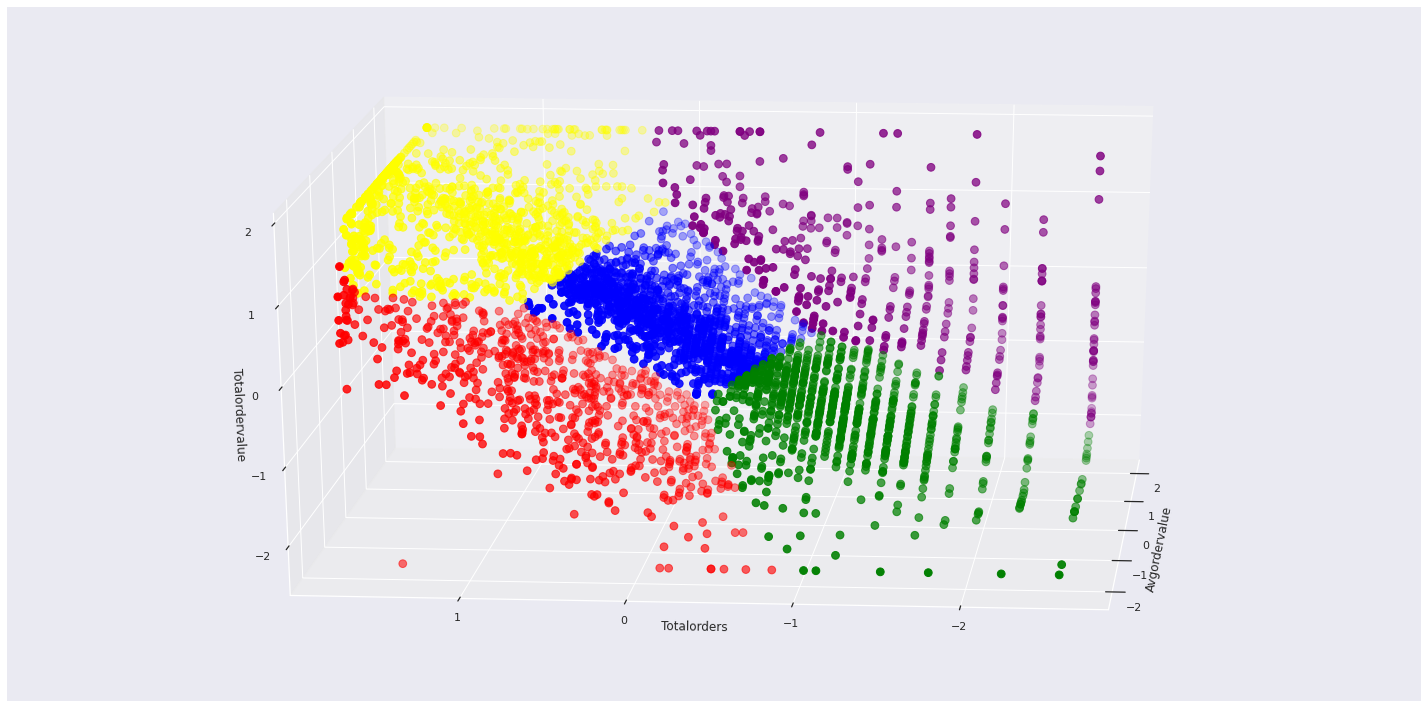

In [246]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3.Avgordervalue[df3.Group == 0], df3["Totalorders"][df3.Group == 0], df3["Totalordervalue"][df3.Group == 0], c='purple', s=60)
ax.scatter(df3.Avgordervalue[df3.Group == 1], df3["Totalorders"][df3.Group == 1], df3["Totalordervalue"][df3.Group == 1], c='red', s=60)
ax.scatter(df3.Avgordervalue[df3.Group == 2], df3["Totalorders"][df3.Group == 2], df3["Totalordervalue"][df3.Group == 2], c='blue', s=60)
ax.scatter(df3.Avgordervalue[df3.Group == 3], df3["Totalorders"][df3.Group == 3], df3["Totalordervalue"][df3.Group == 3], c='green', s=60)
ax.scatter(df3.Avgordervalue[df3.Group == 4], df3["Totalorders"][df3.Group == 4], df3["Totalordervalue"][df3.Group == 4], c='yellow', s=60)
ax.view_init(20, 185)
plt.xlabel("Avgordervalue")
plt.ylabel("Totalorders")
ax.set_zlabel('Totalordervalue')
plt.show()